In [1]:
import yfinance as yf

stock_tickers =['META', 'NFLX', 'TSLA']

database = yf.download(stock_tickers,start='2012-01-01',end ='2021-12-30')
database = database['Adj Close']
data = database.dropna().pct_change(1).dropna()
data

[*********************100%***********************]  3 of 3 completed


Ticker,META,NFLX,TSLA
Date,,,
2012-05-21 00:00:00+00:00,-0.109861,0.025443,0.043904
2012-05-22 00:00:00+00:00,-0.089039,-0.056175,0.070559
2012-05-23 00:00:00+00:00,0.032258,0.062029,0.007143
2012-05-24 00:00:00+00:00,0.032188,-0.022806,-0.023855
2012-05-25 00:00:00+00:00,-0.033909,-0.000711,-0.015522
...,...,...,...
2021-12-22 00:00:00+00:00,-0.011221,0.015407,0.074947
2021-12-23 00:00:00+00:00,0.014495,-0.000244,0.057619
2021-12-27 00:00:00+00:00,0.032633,-0.001580,0.025248


In [2]:
from matplotlib.pyplot import axis
import numpy as np

def Sharpe_Ratio_Criterion(weight,data):
    portfolio_return = np.multiply(data,np.transpose(weight))
    portfolio_return = portfolio_return.sum(axis=1)
    mean = np.mean(portfolio_return,axis = 0)
    std = np.std(portfolio_return,axis =0)
    
    criterion = mean/std
    criterion =-criterion
    return criterion

In [3]:
import numpy as np
from scipy.optimize import minimize

validation_score = 0.3
train_size = int(len(data)*(1-validation_score))
train_data = data.iloc[:train_size,:]
test_data = data.iloc[train_size:,:]

n = train_data.shape[1]

# Different initial guess strategy
x0 = np.ones(n)  # Ensures weights sum to 1

# Constraints
cons = ({'type': 'eq', 'fun': lambda x: np.sum(abs(x)) - 1})  # All weights non-negative

# Bounds
Bounds = [(0, 1) for _ in range(n)]

# Optimization with more iterations
res = minimize(Sharpe_Ratio_Criterion, x0, args=(train_data,), method='SLSQP', constraints=cons, bounds=Bounds, options={'disp': True})

# Print results
optimal_portfolio_weights = res.x
optimal_portfolio_weights

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.09539498102242068
            Iterations: 9
            Function evaluations: 36
            Gradient evaluations: 9


array([0.23452435, 0.48663644, 0.27883921])

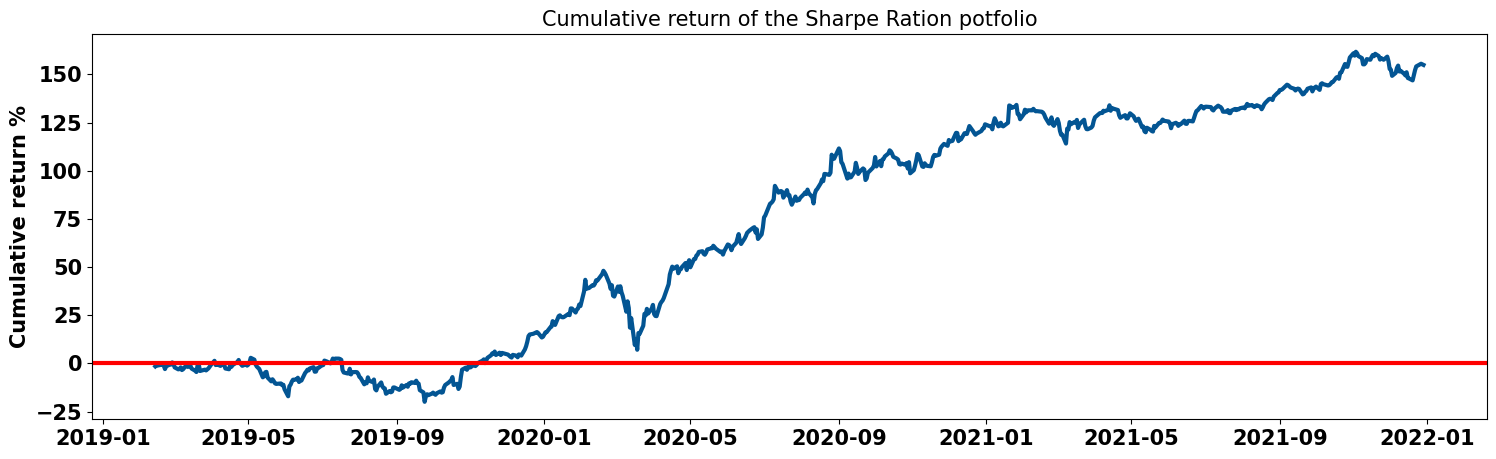

In [4]:
import matplotlib.pyplot as plt

optimal_portfolio_return = np.multiply(test_data,np.transpose(optimal_portfolio_weights))
optimal_portfolio_return = optimal_portfolio_return.sum(axis=1)

plt.figure(figsize=(18,5))
plt.plot(np.cumsum(optimal_portfolio_return)*100,color="#035593",linewidth=3)
plt.ylabel("Cumulative return %", size=15,fontweight="bold")
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.title("Cumulative return of the Sharpe Ration potfolio", size=15)
plt.axhline(0, color="r",linewidth=3)
plt.show()